# 4lang demo

My baseline builds on the 4lang project available on [github](https://github.com/kornai/4lang). Our idea was to use the concept of the
[4lang](https://github.com/kornai/4lang) graphs.

In this notebook I only present the client side of our baseline, the code of the webservice is available on [github](https://github.com/adaamko/4lang). I will present a simple way of using the 4lang graphs for inference. For this task we can calculate similarities among the graphs edges built from the premise and the hypothesis sentences.

If we are ready to make an assumption an inference corresponds with the similarity of the graphs's edges, then this simple method works for a lot of examples, but if we want higher accuracy, we need to define finer techniques. This is where the definitions of the words come into play.

The base url of our service: http://4lang.hlt.bme.hu

Currently our service has three endpoints, with each of them representing different methods:

*  __/default__ - Returns the graphs built from the sentences.
*  __/expand__ - Returns the graphs, where the word's definition has been added to the graph.
*  __/abstract__ - Calling this function, we defined some rules, where we can build a more abstract graph using the definitions.

If you interested in only processing a single sentence, you can call the following endpoints:
*  __/sendef__ - Returns the graphs built from the sentence.
*  __/senexp__ - Returns the graphs, where the word's definition has been added to the graph.
*  __/senabs__ - Calling this function, we defined some rules, where we can build a more abstract graph using the definitions.

You can get a word's definition by calling the defined endpoint:
*  __/definition__ - Returns the graphs built from the word's definition.

First we import the dependencies

In [1]:
import requests
import json
import matplotlib
import re
import pydot
from graphviz import Digraph
from graphviz import Source
from utils import Utils

We can define any two sentences we want the graph to be build on.

In [2]:
premise = 'My poor wife!'
hypothesis = 'I feel bad for my wife!'

If we have the sentences we need to construct our json, and set the headers as well.
The endpoint expects the jason to have the following format:

    {    
        'prem': 'sentence1',       
        'hyp': 'sentence2'        
    }
    

In [3]:
data = {'prem':   premise,
       'hyp':     hypothesis}
data_json = json.dumps(data)
payload = {'json_payload': data_json}
headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}

If we have our json we can make the request chosen from the endpoints. First we make a simple request, only returning the graphs:

In [4]:
r = requests.post("http://hlt.bme.hu/4lang/default", data=data_json, headers=headers)

In the response we get the graphs in nx [MultiDiGraph](https://networkx.github.io/documentation/networkx-1.10/reference/classes.multidigraph.html) format, which we can extract from the jason in the following way:

In [5]:
s_prem = r.json()['prem']
s_hyp = r.json()['hyp']

Now we have our graphs, we need to import networkx, so we can visualize them

In [6]:
import networkx as nx
from networkx.readwrite import json_graph

We need to build the objects from the json, for this task we can use the networkx's __json_graph__ class:

In [7]:
g_prem = json_graph.adjacency.adjacency_graph(s_prem)
g_hyp = json_graph.adjacency.adjacency_graph(s_hyp)

After we have our objects, all we need to do is to visualize them, I used [graphviz](http://graphviz.readthedocs.io/en/stable/manual.html)
__dot__ format.

In [8]:
utils = Utils()
prem_dot = utils.to_dot(g_prem)
hyp_dot = utils.to_dot(g_hyp)

After we have the dot strings, we can use [Source](http://graphviz.readthedocs.io/en/stable/api.html#source).

In [9]:
v_prem = Source(prem_dot)
v_hyp = Source(hyp_dot)

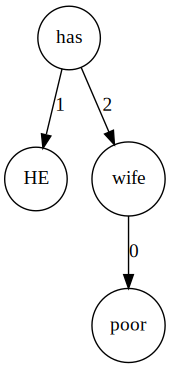

In [10]:
v_prem

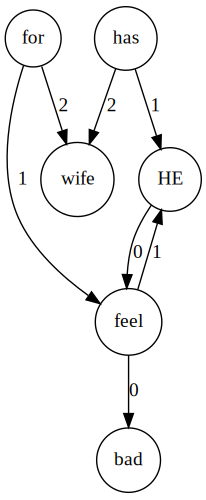

In [11]:
v_hyp

We can calculate similarities between the graphs edges as well, using the method I defined in the utils module. For this first we can get the edges, after we can call __asim_jac__ for calculation.

In [12]:
edges_prem = utils.get_edges(g_prem)
edges_hyp = utils.get_edges(g_hyp)
sim = utils.asim_jac(edges_prem, edges_hyp)
print(sim)

0.2857142857142857


You can use the service to simply process a single sentence:

In [13]:
sentence = 'My name is Adam.'
data = {'sentence':   sentence}
data_json = json.dumps(data)
payload = {'json_payload': data_json}
headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}
r = requests.post("http://hlt.bme.hu/4lang/sendef", data=data_json, headers=headers)
s_machines = r.json()['sentence']

In [14]:
g_sen = json_graph.adjacency.adjacency_graph(s_machines)
s_dot = utils.to_dot(g_sen)
v_sen = Source(s_dot)

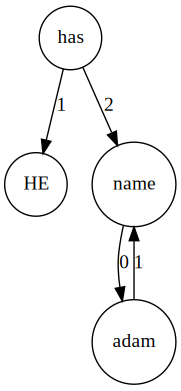

In [15]:
v_sen

Or if you want to get a word's definition, for example __father__'s:

In [16]:
word = 'father'
data = {'word':   word}
data_json = json.dumps(data)
payload = {'json_payload': data_json}
headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}
r = requests.post("http://hlt.bme.hu/4lang/definition", data=data_json, headers=headers)
w_def = r.json()['word']

In [17]:
g_def = json_graph.adjacency.adjacency_graph(w_def)
w_dot = utils.to_dot(g_def)
v_def = Source(w_dot)

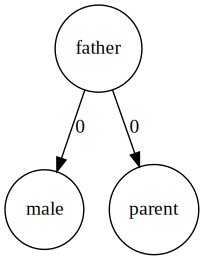

In [18]:
v_def

To get finer methods, you can use the other two endpoints: __expand__ and __abstract__, with algorithms behind them discussed in the other notebook!